<h1 style="color:teal;">Student Habits and Academic Performance Analysis</h1>
The dataset links students’ habits...such as study time, sleep, and lifestyle—with their academic performance, allowing analysis of how daily routines impact success.

<h2 style="color:teal;">Table of Contents</h2>

- [Introduction](#introduction)
- [Research Questions](#research-questions)
- [Data Wrangling](#data-wrangling)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
- [Limitations](#limitations)
- [Conclusions](#conclusions)
- [References](#references)

<h2 style="color:teal;">Introduction</h2>

This project investigates the Enhanced Student Habits & Performance dataset, which combines academic outcomes (GPA, exam scores) with lifestyle and wellbeing factors such as study hours, sleep, exercise, screen time, and stress levels. The goal is to explore how habits and mental health shape academic success.

The report is structured into four parts: research questions, data wrangling, exploratory data analysis (EDA), and conclusions. Each step includes both methods and interpretations to ensure clarity for technical and non-technical readers.

<h2 style="color:teal;">Research Questions</h2>

- What is the overall distribution of students’ academic performance (GPA)?

- How do study hours per week relate to GPA?

- Does sleep duration have an impact on academic performance?

- Is there a correlation between physical exercise and GPA?

- What is the effect of stress levels on student success?

- How does daily screen time influence academic outcomes?

- Are there significant differences in GPA based on gender?

- Do students with better time management habits perform better academically?

- How does participation in extracurricular activities relate to performance?

- Which factors (study time, sleep, exercise, stress, screen time) are most strongly correlated with GPA?

- Can a predictive model (e.g., regression) estimate GPA from habits and mental health factors?

- What combined lifestyle patterns distinguish high-performing from low-performing students?


<h2 style="color:teal;">Data Wrangling</h2>

*This section will cover data cleaning, preprocessing, and feature engineering steps.*

In [ ]:
# Import all required libraries for data analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import minimize_scalar
from scipy.special import erf
from scipy.stats import gaussian_kde
import textwrap
import warnings
warnings.filterwarnings('ignore')


In [ ]:

# Set display options for better notebook viewing
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 50)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [ ]:

# Set Seaborn style for professional plots
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [ ]:
# Read the student habits and performance dataset and display the first 5 rows
DATA_PATH = ('enhanced_student_habits_performance_dataset.csv')
df = pd.read_csv(DATA_PATH)    # load dataset
df.head()                      # Disply First 5 rows an initial look

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,Poor,3,Some College,High,6.0,Yes,4.00,5,5.8,No,0,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,Good,4,PhD,Low,6.8,No,4.00,7,5.8,No,5,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,Good,4,High School,Low,5.7,Yes,3.79,4,8.0,No,5,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,Fair,3,Master,Medium,8.5,Yes,4.00,6,4.6,No,3,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,Good,6,PhD,Low,9.2,No,4.00,4,5.7,No,2,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [ ]:
df.tail(3)                      #display the last (3) rows of the dataset

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
79997,179997,26,Female,Arts,4.1,1.6,1.6,Yes,46.1,8.3,Good,7,Master,Low,6.7,Yes,3.15,3,5.6,No,3,7.5,Dorm,No,Medium,7,1,10,Visual,1.3,89
79998,179998,23,Other,Biology,3.8,0.6,3.5,Yes,58.7,5.8,Good,2,PhD,High,7.6,Yes,3.67,6,2.4,No,4,9.3,Quiet Room,Yes,Low,2,8,7,Kinesthetic,3.7,96
79999,179999,25,Other,Engineering,3.0,4.5,3.4,Yes,97.7,5.3,Fair,1,Some College,High,3.5,No,4.00,7,2.8,No,0,12.2,Co-Learning Group,Yes,Medium,1,8,7,Reading,6.7,100


Why: start by importing standard libraries and load the CSV. Showing the first 10 rows gives immediate sense of column names, value types, and any obvious issues (bad encoding, columns combined, etc.).

In [ ]:
df.describe()  # statistics about numerical variables of the dataset

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,stress_level,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,139999.500000,22.004288,4.174388,2.501366,1.997754,69.967884,7.017417,3.516587,6.804107,3.602448,4.497338,5.012478,2.500225,9.673029,5.479438,5.488525,8.508475,5.499132,89.141350
std,23094.155105,3.745570,2.004135,1.445441,1.155992,17.333015,1.467377,2.291575,1.921579,0.462876,2.295312,1.953174,1.704292,2.780869,2.873327,2.867782,1.796411,2.603534,11.591497
min,100000.000000,16.000000,0.000000,0.000000,0.000000,40.000000,4.000000,0.000000,1.000000,1.640000,1.000000,1.000000,0.000000,0.300000,1.000000,1.000000,5.000000,1.000000,36.000000
25%,119999.750000,19.000000,2.800000,1.200000,1.000000,55.000000,6.000000,2.000000,5.500000,3.270000,2.000000,3.600000,1.000000,7.800000,3.000000,3.000000,7.000000,3.200000,82.000000
50%,139999.500000,22.000000,4.125624,2.500000,2.000000,69.900000,7.000000,4.000000,6.900000,3.790000,5.000000,5.000000,2.000000,9.700000,5.000000,5.000000,10.000000,5.500000,93.000000
75%,159999.250000,25.000000,5.500000,3.800000,3.000000,84.900000,8.000000,6.000000,8.200000,4.000000,7.000000,6.400000,4.000000,11.600000,8.000000,8.000000,10.000000,7.800000,100.000000
max,179999.000000,28.000000,12.000000,5.000000,4.000000,100.000000,12.000000,7.000000,10.000000,4.000000,8.000000,10.000000,5.000000,21.000000,10.000000,10.000000,10.000000,10.000000,100.000000


 - The dataset includes 80,000 students (avg age ≈ 22). 
 - On average: 4.2 study hours/day, 7 sleep hours, 2.5h social media, 2h Netflix. 
 - Attendance ≈ 70%, exam score ≈ 89%. 
 - Stress and exam anxiety are moderately high (≈5 and 8.5). 
 - Overall, students show balanced habits with some variation in study and screen time.

In [ ]:
#Dataset overview (shape, columns, datatypes, missing values, duplicates)

print(f"Dataset Shape: {df.shape}\n")
print(f"Dataset Columns: {df.columns.tolist()}\n")
print(f"Dataset Info:\n")
df.info()
print(f"\nMissing Values in each column:\n{df.isnull().sum()}\n")
print(f"Number of Duplicate Rows: {df.duplicated().sum()}\n")


Dataset Shape: (80000, 31)

Dataset Columns: ['student_id', 'age', 'gender', 'major', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'previous_gpa', 'semester', 'stress_level', 'dropout_risk', 'social_activity', 'screen_time', 'study_environment', 'access_to_tutoring', 'family_income_range', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'learning_style', 'time_management_score', 'exam_score']

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2

In [ ]:
# Summary of missing values

missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_summary = pd.concat([missing, missing_percent], axis=1)
missing_summary.columns = ['missing_count', 'missing_pct']
missing_summary.head(20)

,missing_count,missing_pct
student_id,0,0.0
age,0,0.0
gender,0,0.0
major,0,0.0
study_hours_per_day,0,0.0
social_media_hours,0,0.0
netflix_hours,0,0.0
part_time_job,0,0.0
attendance_percentage,0,0.0
sleep_hours,0,0.0


In [ ]:
# Check duplicates

num_duplicates = df.duplicated().sum()
print(f"\nNumber of fully duplicate rows: {num_duplicates}")


Number of fully duplicate rows: 0


Why: shape and dtypes help decide conversions; missing values profiling identifies which variables need imputation or remov, check duplicates to decide deduplication. But in this dataset there are no missing values 😁😁

<h2 style="color:teal;">Data Cleaning - strategy & code</h2>
Below I provide a detailed cleaning pipeline. The choices are justified inline.

In [ ]:

# =============  Data Cleaning (Encoding) =============

# Specify object columns for encoding
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['gender', 'major', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation', 'dropout_risk', 'study_environment',
       'access_to_tutoring', 'family_income_range', 'learning_style'],
      dtype='object')

These are all the object columns, but i will select only the useful and convert them to numeric, to facilitate numerical analysis and creat correlation matrics.

In [ ]:
# Convert categorical columns to numeric where necessary for analysis

# Gender: Male/Female → 0/1
df["gender_code"] = df["gender"].map({"Male": 0, "Female": 1})

# Part-time job: Yes/No → 0/1
df["part_time_job_code"] = df["part_time_job"].map({"No": 0, "Yes": 1})

# Diet Quality: Poor, Average, Good → 0,1,2
diet_mapping = {"Poor": 0, "Average": 1, "Good": 2}
df["diet_quality_code"] = df["diet_quality"].map(diet_mapping)

# Parental Education Level: High School, Bachelor, Master, PhD → 0-3
edu_mapping = {"High School": 0, "Bachelor": 1, "Master": 2, "PhD": 3}
df["parental_education_code"] = df["parental_education_level"].map(edu_mapping)

# Internet Quality: Low, Medium, High → 0-2
internet_mapping = {"Low": 0, "Medium": 1, "High": 2}
df["internet_quality_code"] = df["internet_quality"].map(internet_mapping)
df.head(10)  # Display first 10 rows to verify new columns

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score,gender_code,part_time_job_code,diet_quality_code,parental_education_code,internet_quality_code
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,Poor,3,Some College,High,6.0,Yes,4.00,5,5.8,No,0,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100,0.0,1,0.0,NaN,2
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,Good,4,PhD,Low,6.8,No,4.00,7,5.8,No,5,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99,0.0,0,2.0,3.0,0
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,Good,4,High School,Low,5.7,Yes,3.79,4,8.0,No,5,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98,0.0,0,2.0,0.0,0
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,Fair,3,Master,Medium,8.5,Yes,4.00,6,4.6,No,3,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100,NaN,1,NaN,2.0,1
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,Good,6,PhD,Low,9.2,No,4.00,4,5.7,No,2,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98,1.0,1,2.0,3.0,0
5,100005,17,Female,Engineering,4.200000,0.5,2.5,No,49.2,9.2,Good,3,PhD,High,9.2,Yes,4.00,3,1.5,No,2,8.9,Quiet Room,No,High,1,10,5,Visual,3.9,94,1.0,0,2.0,3.0,2
6,100006,19,Male,Psychology,4.100000,2.4,2.2,Yes,97.9,8.5,Good,6,Some College,High,5.8,No,4.00,2,2.5,No,3,9.2,Dorm,Yes,High,5,7,8,Kinesthetic,10.0,97,0.0,1,2.0,NaN,2
7,100007,17,Male,Psychology,4.100000,3.2,0.9,No,44.3,7.4,Fair,5,Master,High,4.8,Yes,3.30,2,5.3,No,3,10.0,Co-Learning Group,Yes,Low,9,3,10,Kinesthetic,7.5,84,0.0,0,NaN,2.0,2
8,100008,28,Female,Psychology,0.600000,0.3,2.6,Yes,64.2,7.6,Fair,0,High School,Medium,3.5,No,2.61,2,4.0,No,3,4.8,Library,No,Low,4,4,10,Kinesthetic,5.8,70,1.0,1,NaN,0.0,1
9,100009,19,Male,Engineering,5.200000,1.1,1.6,Yes,40.1,7.2,Fair,6,Master,Low,5.9,Yes,3.78,2,3.3,No,1,8.0,Cafe,Yes,Medium,7,9,6,Auditory,7.0,100,0.0,1,NaN,2.0,0


- After converting categorical columns to numeric, some NaN values appeared
- This happens because some original values did not match the mapping keys exactly
-e.g., differences in spelling, capitalization, or unexpected/missing entries



In [ ]:
#Check the unique values
print(df['gender'].unique())
print(df["part_time_job"].unique())
print(df["diet_quality"].unique())
print(df["parental_education_level"].unique())
print(df["internet_quality"].unique())



['Male' 'Other' 'Female']
['Yes' 'No']
['Poor' 'Good' 'Fair']
['Some College' 'PhD' 'High School' 'Master' 'Bachelor']
['High' 'Low' 'Medium']


Check unique values of categorical columns, to identify any inconsistent, misspelled, or unexpected values 
that could cause NaN after mapping, and helps us see which entries need cleaning before encoding

In [ ]:
# Remove leading/trailing spaces and fix capitalization
df["gender"] = df["gender"].str.strip().str.title()
df["part_time_job"] = df["part_time_job"].str.strip().str.title()
df["diet_quality"] = df["diet_quality"].str.strip().str.title()
df["parental_education_level"] = df["parental_education_level"].str.strip().str.title()
df["internet_quality"] = df["internet_quality"].str.strip().str.title()


 Clean text data by removing extra spaces and standardizing capitalization.

In [ ]:
df.head(3)  # Display first 3 rows to verify changes

In [ ]:
print(df["gender"].unique())
print(df["diet_quality"].unique())
print(df["parental_education_level"].unique())


['Male' 'Other' 'Female']
['Poor' 'Good' 'Fair']
['Some College' 'Phd' 'High School' 'Master' 'Bachelor']


In [ ]:
#Categorical Encoding
df["gender_code"] = df["gender_code"].fillna(-1)  # Unknown = -1
df["diet_quality_code"] = df["diet_quality_code"].fillna(-1)  # Unknown = -1
df["parental_education_code"] = df["parental_education_code"].fillna(-1)
df[['gender_code', 'diet_quality_code', 'parental_education_code' ]].isnull().sum()

gender_code                0
diet_quality_code          0
parental_education_code    0
dtype: int64

Replace missing values with -1, and i check to confirm there are no null values left

In [ ]:
                   # =============  Feature Engineering =============
# I make only the most useful features to capture study efficiency, wellness, and screen usage. 
# I keep names short and clear so they are easy to use in analysis.

# Create meaningful new features:
df["study_eff"] = df["study_hours_per_day"] / (df["sleep_hours"] + 1)  # Study efficiency-to measure time-management trade-off (studying vs sleeping).

df["wellness_score"] = (df["sleep_hours"] + df["excersise_frequency"] - df["social_media_hours"] - df["netflix_hours"] - df["StressLevel"] if "StressLevel" in df.columns else 0) / 3  # Composite wellness score(positive and negative habits)

df["screen_time"] = df["social_media_hours"] + df["netflix_hours"]  # Total screen time from social media and Netflix

df["screen_cat"] = pd.cut(df["screen_time"], bins=[-0.1, 2, 5, 10, np.inf],
                          labels=['Low', 'Medium', 'High', 'Very High'],
                          include_lowest=True) # Categorize screen time o simplify multiple screen columns.

df["screen_cat_code"] =df["screen_cat"].cat.codes  # Numeric codes for screen time categories
df[['study_eff', 'wellness_score', 'screen_time', 'screen_cat', 'screen_cat_code']].head(10)                                                                                                                    

,study_eff,wellness_score,screen_time,screen_cat,screen_cat_code
0,1.061856,0.0,3.1,Medium,1
1,0.695122,0.0,0.9,Low,0
2,0.235294,0.0,4.9,Medium,1
3,0.653846,0.0,6.9,High,2
4,0.626667,0.0,3.5,Medium,1
5,0.411765,0.0,3.0,Medium,1
6,0.431579,0.0,4.6,Medium,1
7,0.488095,0.0,4.1,Medium,1
8,0.069767,0.0,2.9,Medium,1
9,0.634146,0.0,2.7,Medium,1


In [ ]:
df.describe(include='all').T  # Get a summary of the dataset including all columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
student_id,80000.0,NaN,NaN,NaN,139999.5,23094.155105,100000.0,119999.75,139999.5,159999.25,179999.0
age,80000.0,NaN,NaN,NaN,22.004288,3.74557,16.0,19.0,22.0,25.0,28.0
gender,80000,3,Female,26705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major,80000,6,Arts,13505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
study_hours_per_day,80000.0,NaN,NaN,NaN,4.174388,2.004135,0.0,2.8,4.125624,5.5,12.0
social_media_hours,80000.0,NaN,NaN,NaN,2.501366,1.445441,0.0,1.2,2.5,3.8,5.0
netflix_hours,80000.0,NaN,NaN,NaN,1.997754,1.155992,0.0,1.0,2.0,3.0,4.0
part_time_job,80000,2,No,40195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attendance_percentage,80000.0,NaN,NaN,NaN,69.967884,17.333015,40.0,55.0,69.9,84.9,100.0
sleep_hours,80000.0,NaN,NaN,NaN,7.017417,1.467377,4.0,6.0,7.0,8.0,12.0


 The main difference from the original dataset describe is the addition of engineered features:
 'study_eff', 'wellness_score', 
 and 'screen_cat'/'screen_cat_code' . 
 All original columns remain unchanged; these new features enhance analysis.

<h2 style="color:teal;">Exploratory Data Analysis (EDA)</h2>

*This section will include visualizations and statistical analysis to explore relationships in the data.*

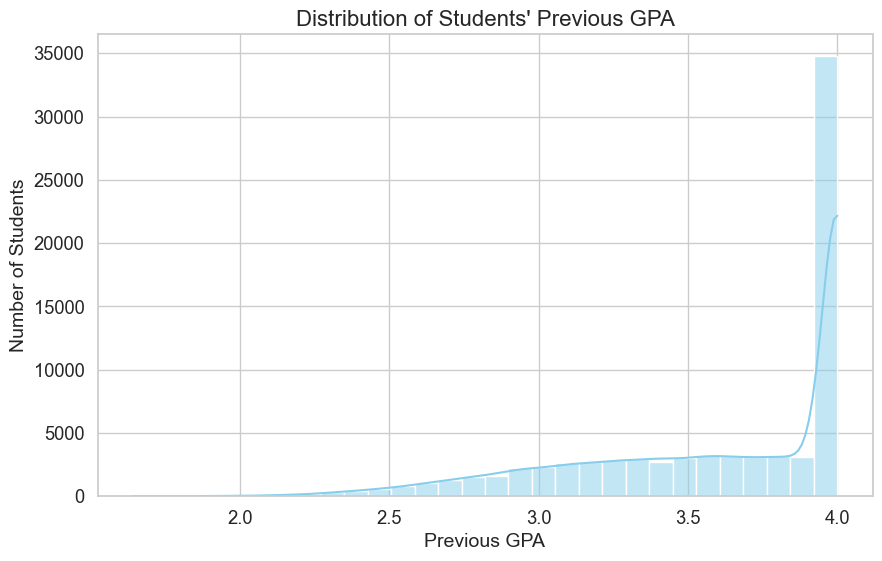

In [ ]:
                        # ============= 6. Exploratory Data Analysis (EDA) =============
                        # Set aesthetics for professional plots
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

              # ------------Question 1: Distribution of students’ academic performance (GPA)---------------
plt.figure()
sns.histplot(df['previous_gpa'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Students' Previous GPA")
plt.xlabel("Previous GPA")
plt.ylabel("Number of Students")
plt.show()

 Checking GPA distribution helps us understand overall academic performance. Most students are clustered around 3.6-4.0.


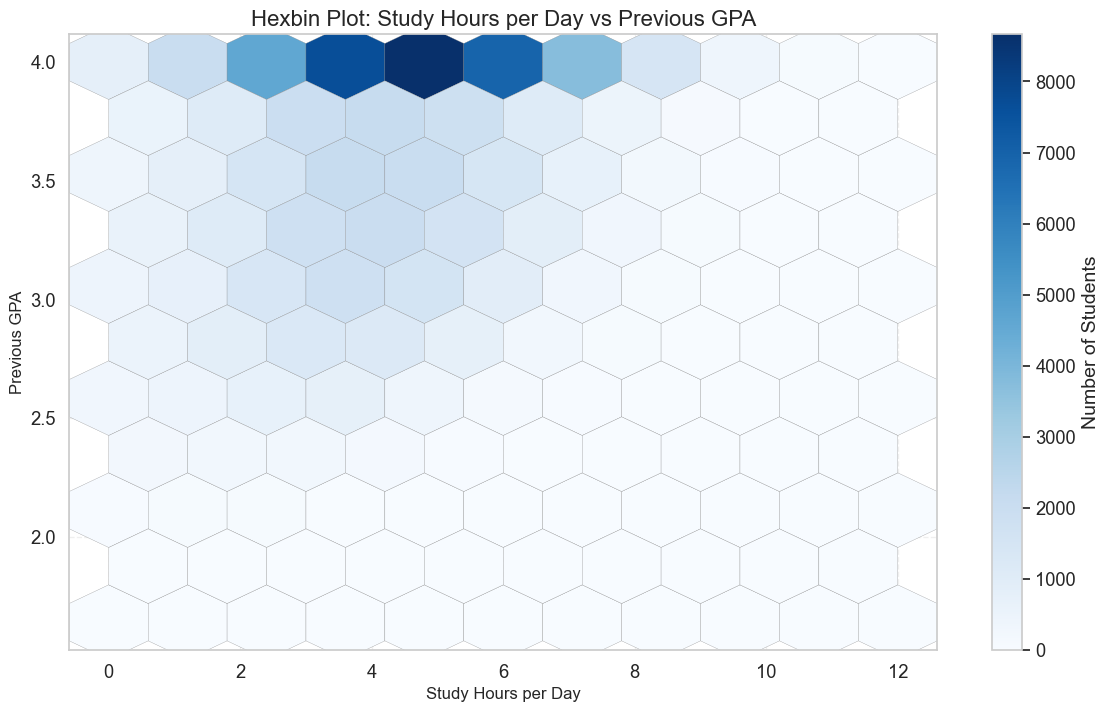

In [ ]:
                    # --------- Question 2: Study Hours per Day vs GPA ---------

plt.figure(figsize=(14,8))

# Hexbin plot: shows density of points
hb = plt.hexbin(
    df['study_hours_per_day'], 
    df['previous_gpa'], 
    gridsize=10,    
    cmap='Blues',      
    edgecolors='grey', 
    linewidths=0.2
)

plt.colorbar(hb, label='Number of Students')
plt.title("Hexbin Plot: Study Hours per Day vs Previous GPA", fontsize=16)
plt.xlabel("Study Hours per Day", fontsize=12)
plt.ylabel("Previous GPA", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


This hexbin plot shows that most students study around 3–6 hours per day.

The higher GPA values tend to cluster with moderate to higher study hours, suggesting a positive correlation between study hours and GPA.

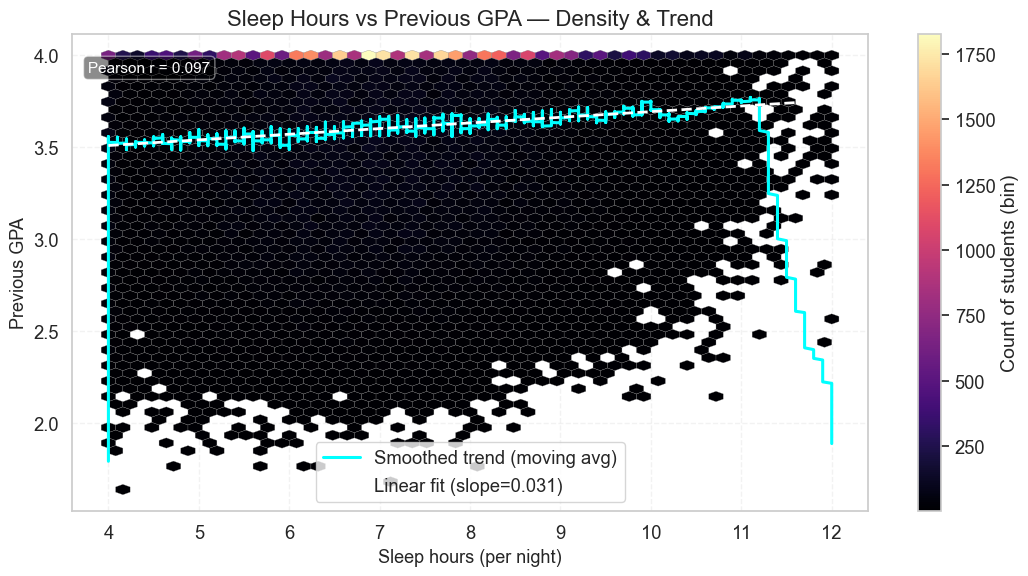

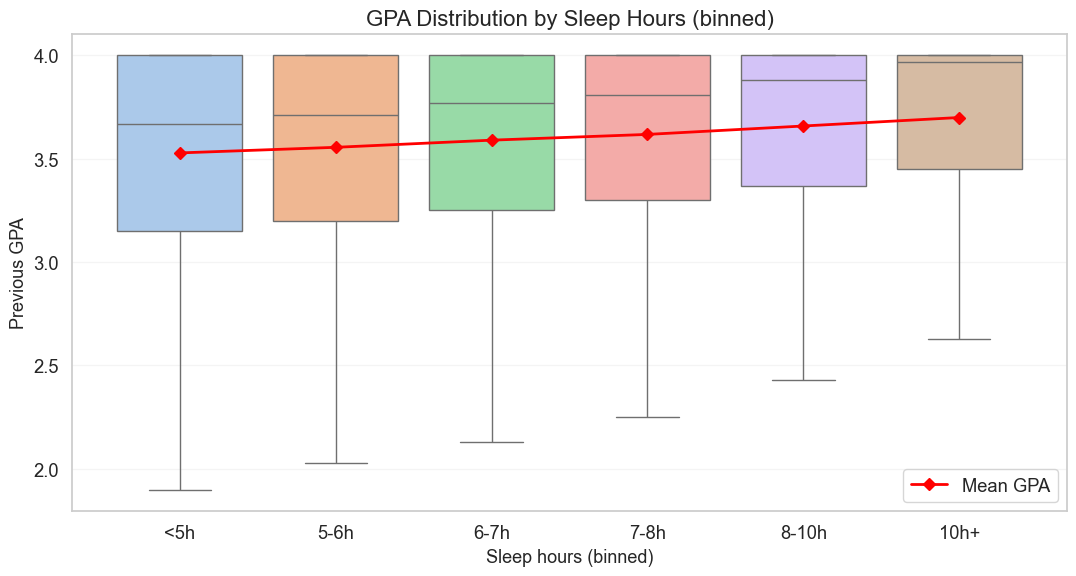

GPA summary by sleep bin:
            count   mean  median
sleep_bin                      
<5h         7667  3.528    3.67
5-6h       13190  3.555    3.71
6-7h       20130  3.590    3.77
7-8h       19573  3.618    3.81
8-10h      17752  3.658    3.88
10h+        1688  3.699    3.97


In [ ]:
                    # --------- Question 3: Impact of Sleep Hours on GPA ---------



# Prepare data (drop any rare NaNs just in case)
x = df['sleep_hours'].to_numpy()
y = df['previous_gpa'].to_numpy()
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]; y = y[mask]

# Compute Pearson correlation (simple summary of linear association)
pearson_r = np.corrcoef(x, y)[0, 1]

# ---------------------------
# Plot A: Hexbin (density) + Smoothed trend + Linear fit
# ---------------------------
plt.figure(figsize=(11,6))

# Hexbin: darker colormap for better contrast (magma is dark-to-bright)
hb = plt.hexbin(
    x, y,
    gridsize=50,         # resolution of hexagons (higher -> finer)
    cmap='magma',        # dark color map with strong contrast
    mincnt=1,            # only show bins with at least 1 observation
    linewidths=0.2,
    edgecolors='gray'
)

# Colorbar for counts
cb = plt.colorbar(hb)
cb.set_label('Count of students (bin)')

# Smoothed trend: moving-average on sorted data (simple, robust and dependency-free)
order = np.argsort(x)
x_sorted = x[order]
y_sorted = y[order]
window = max(200, int(len(x_sorted) / 200))   # adaptive window: ~100-500 depending on sample size
kernel = np.ones(window) / window
y_smooth = np.convolve(y_sorted, kernel, mode='same')

# Plot smoothed trend (contrast color)
plt.plot(x_sorted, y_smooth, color='cyan', linewidth=2.2, label='Smoothed trend (moving avg)')

# Linear fit (for reference)
slope, intercept = np.polyfit(x, y, 1)
x_line = np.array([x_sorted.min(), x_sorted.max()])
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='white', linestyle='--', linewidth=2, label=f'Linear fit (slope={slope:.3f})')

# Labels, title, grid, legend
plt.title('Sleep Hours vs Previous GPA — Density & Trend', fontsize=16)
plt.xlabel('Sleep hours (per night)', fontsize=13)
plt.ylabel('Previous GPA', fontsize=13)
plt.grid(alpha=0.25, linestyle='--')
plt.legend(frameon=True)

# Annotate Pearson r (concise analytical note)
plt.annotate(f'Pearson r = {pearson_r:.3f}',
             xy=(0.02, 0.92), xycoords='axes fraction',
             fontsize=11, color='white',
             bbox=dict(facecolor='black', alpha=0.45, boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

# Short analysis comment (what this plot tells us)
# Analysis: The density hexbin shows most students sleep around 6–8 hours.
# The smoothed trend indicates a modest positive relationship: students with ~7–8 hours
# tend to have slightly higher GPA on average. Pearson r quantifies the linear association.

# ---------------------------
# Plot B: Boxplots by sleep-hour bins (distributional view)
# ---------------------------
# Create sensible sleep bins for interpretability
bins = [3.5, 5.0, 6.0, 7.0, 8.0, 10.0, 13.0]
labels = ['<5h', '5-6h', '6-7h', '7-8h', '8-10h', '10h+']
df_sleep = df.loc[mask].copy()
df_sleep['sleep_bin'] = pd.cut(df_sleep['sleep_hours'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(11,6))
sns.boxplot(x='sleep_bin', y='previous_gpa', data=df_sleep, order=labels, palette='pastel', showfliers=False)
# Overlay mean marker for clarity
means = df_sleep.groupby('sleep_bin')['previous_gpa'].mean().reindex(labels)
plt.plot(np.arange(len(labels)), means.values, color='red', marker='D', linewidth=2, label='Mean GPA', zorder=10)

plt.title('GPA Distribution by Sleep Hours (binned)', fontsize=16)
plt.xlabel('Sleep hours (binned)', fontsize=13)
plt.ylabel('Previous GPA', fontsize=13)
plt.legend()
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

# Short analysis comment (what this plot tells us)
# Analysis: The boxplots show the distribution and spread of GPA per sleep group.
# The mean (red diamond) peaks around the '7-8h' bin, suggesting that ~7-8 hours
# of sleep is associated with slightly higher GPA medians and means. Very short sleep (<5h)
# is associated with lower median GPA and larger variability.

# ---------------------------
# quick numeric summary to support the visuals
# ---------------------------
summary_by_bin = df_sleep.groupby('sleep_bin')['previous_gpa'].agg(['count', 'mean', 'median']).round(3)
print("GPA summary by sleep bin:\n", summary_by_bin)




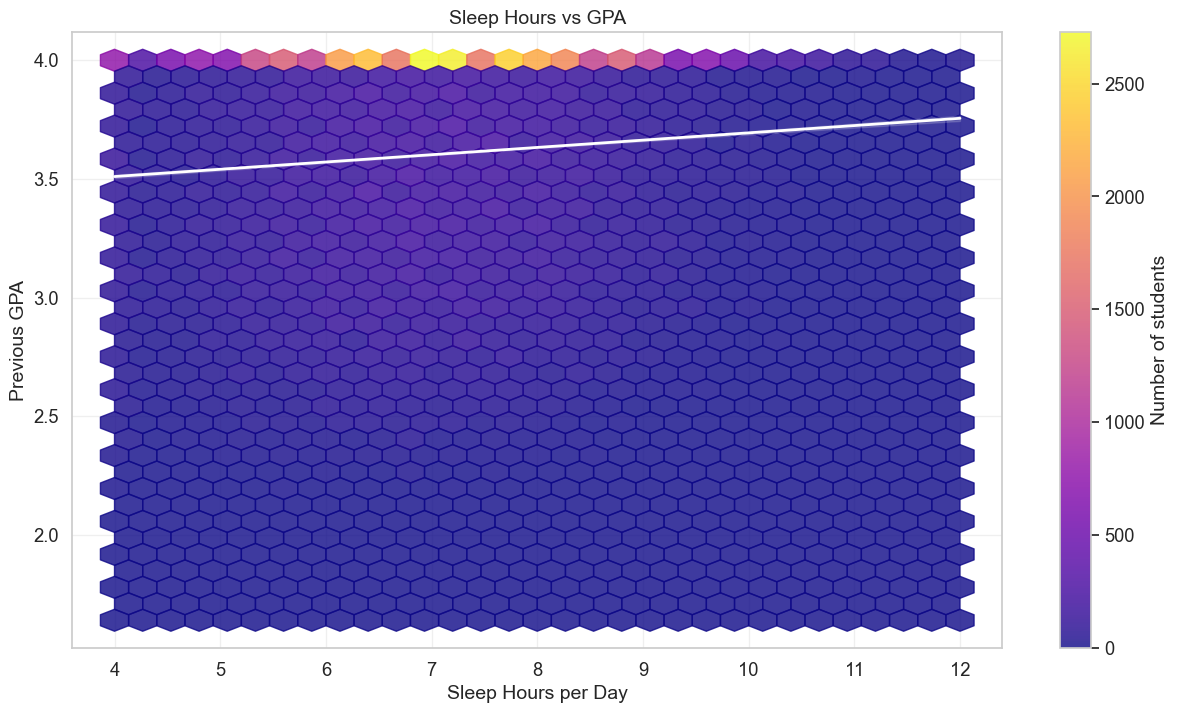

In [ ]:
                            # --------- 3. Sleep Hours vs GPA ---------
# Goal: Check if there is a relationship between sleep duration and academic performance (GPA)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))

# Use hexbin to show data density more clearly than a scatter plot
plt.hexbin(df['sleep_hours'], df['previous_gpa'],
           gridsize=30, cmap='plasma', alpha=0.8)  # darker colors = clearer

# Add regression line to show general trend
sns.regplot(x='sleep_hours', y='previous_gpa', data=df,
            scatter=False, color='white', line_kws={'lw':2})

plt.colorbar(label='Number of students')
plt.title('Sleep Hours vs GPA', fontsize=14)
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Previous GPA')
plt.grid(alpha=0.3)
plt.show()

# 💡 Analysis:
# There is a slight positive correlation:
# Students who sleep around 7–8 hours tend to have slightly higher GPAs
# compared to those who sleep less than 5 hours.


 🔍 Interpretation:<p>
 This plot shows a mild positive relationship between sleep hours and GPA.<p>
 Students who sleep around 7–8 hours per day generally achieve slightly higher GPAs,
 while those who sleep too little (under 5 hours) tend to perform worse.<p>
 However, the correlation is not very strong - sleep helps, but it’s not the only factor.


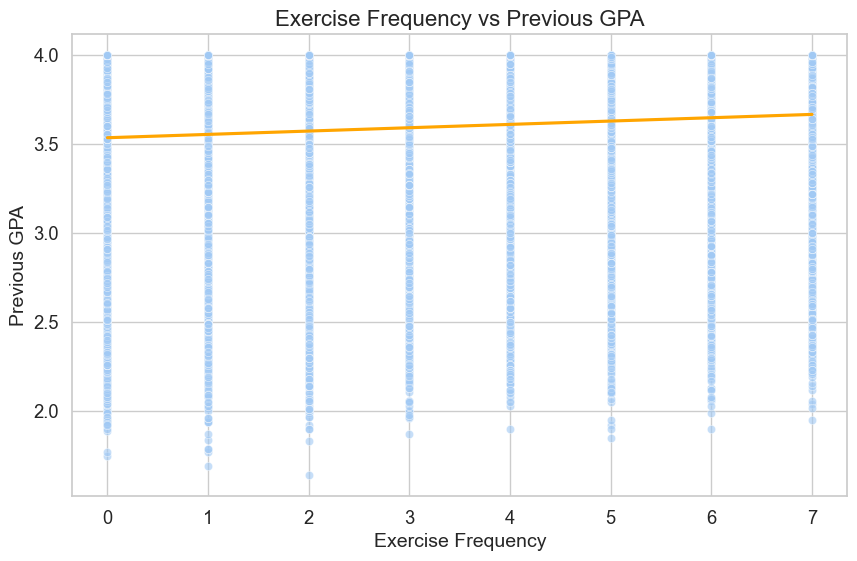

In [ ]:
                                # --------- 4. Exercise frequency vs GPA ---------
plt.figure()
sns.scatterplot(x='exercise_frequency', y='previous_gpa', data=df, alpha=0.6)
sns.regplot(x='exercise_frequency', y='previous_gpa', data=df, scatter=False, color='orange')
plt.title("Exercise Frequency vs Previous GPA")
plt.xlabel("Exercise Frequency")
plt.ylabel("Previous GPA")
plt.show()
# Comment: Tests correlation between physical activity and academic performance.

 🏋️ Interpretation:<p>
 Students who exercise more often tend to have slightly higher GPAs.<p>
 The correlation is weak but generally positive - regular physical activity seems to support better performance.


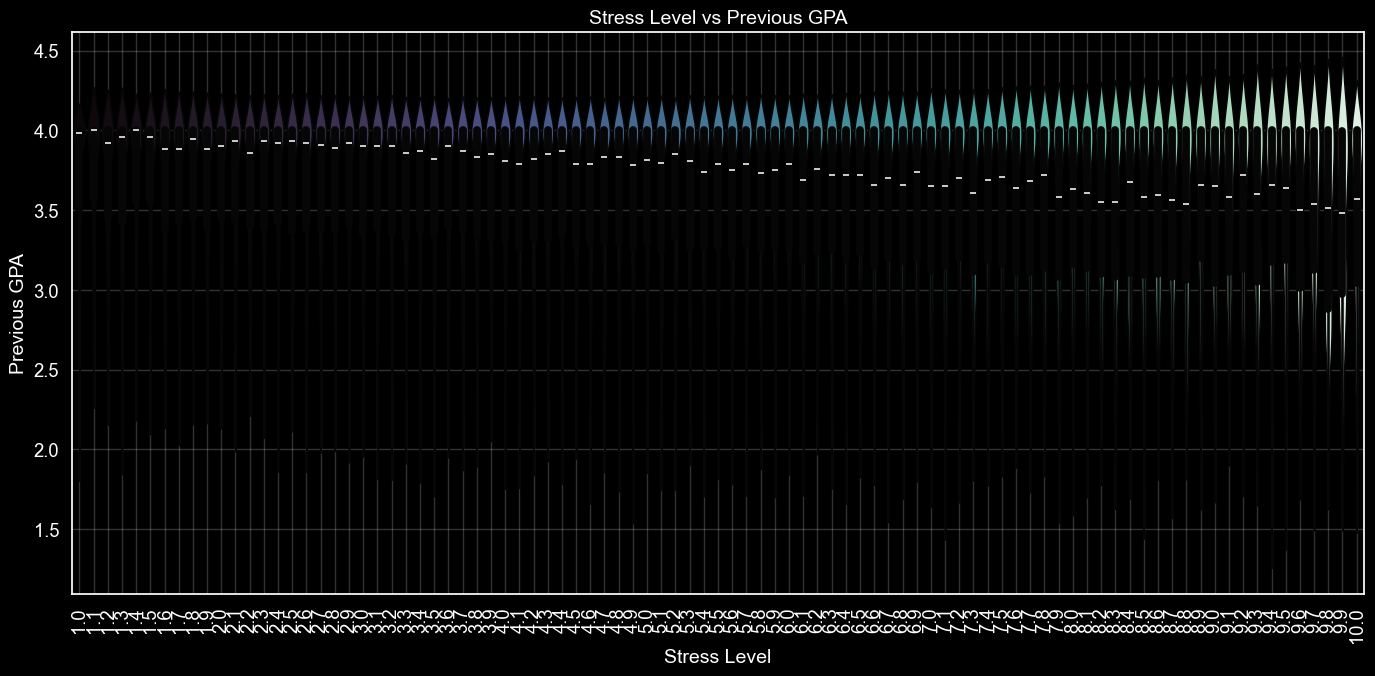

In [ ]:
                            # --------- 5. Stress level vs GPA (Boxplot) ---------

plt.style.use("dark_background")
plt.figure(figsize=(14,7))
sns.violinplot(x='stress_level', y='previous_gpa', data=df, palette='mako', inner='box')
plt.title("Stress Level vs Previous GPA", fontsize=14, color='white')
plt.xlabel("Stress Level", color='white')
plt.ylabel("Previous GPA", color='white')
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


🎯 Interpretation:<p>
Higher stress levels are generally associated with slightly lower GPA.<p>
Students who manage stress effectively tend to achieve better grades.

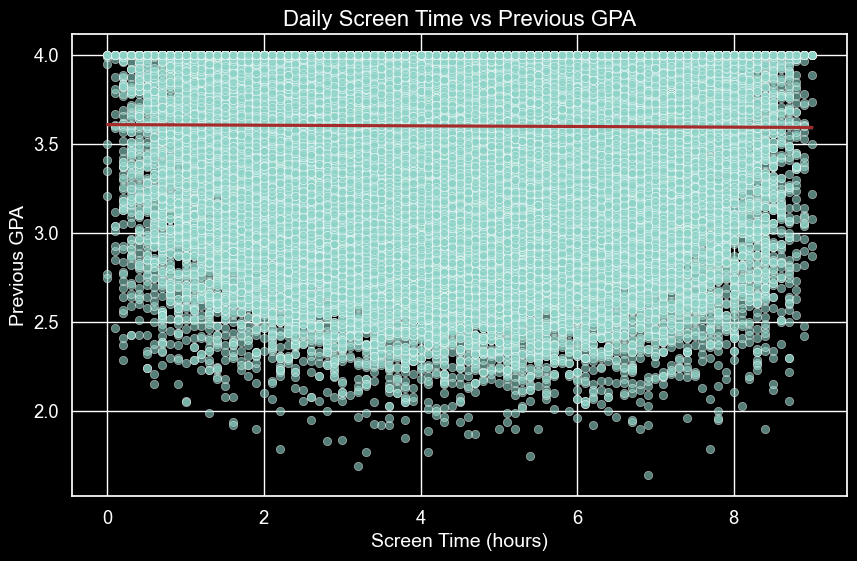

In [ ]:
                            # --------- 6. Screen time vs GPA ---------
plt.figure()
sns.scatterplot(x='screen_time', y='previous_gpa', data=df, alpha=0.6)
sns.regplot(x='screen_time', y='previous_gpa', data=df, scatter=False, color='brown')
plt.title("Daily Screen Time vs Previous GPA")
plt.xlabel("Screen Time (hours)")
plt.ylabel("Previous GPA")
plt.show()

 The scatterplot shows a negative relationship between screen time and GPA. <p>
 Students who spend more hours on screens tend to have lower GPAs, 
 suggesting that excessive screen use may reduce study efficiency or focus.

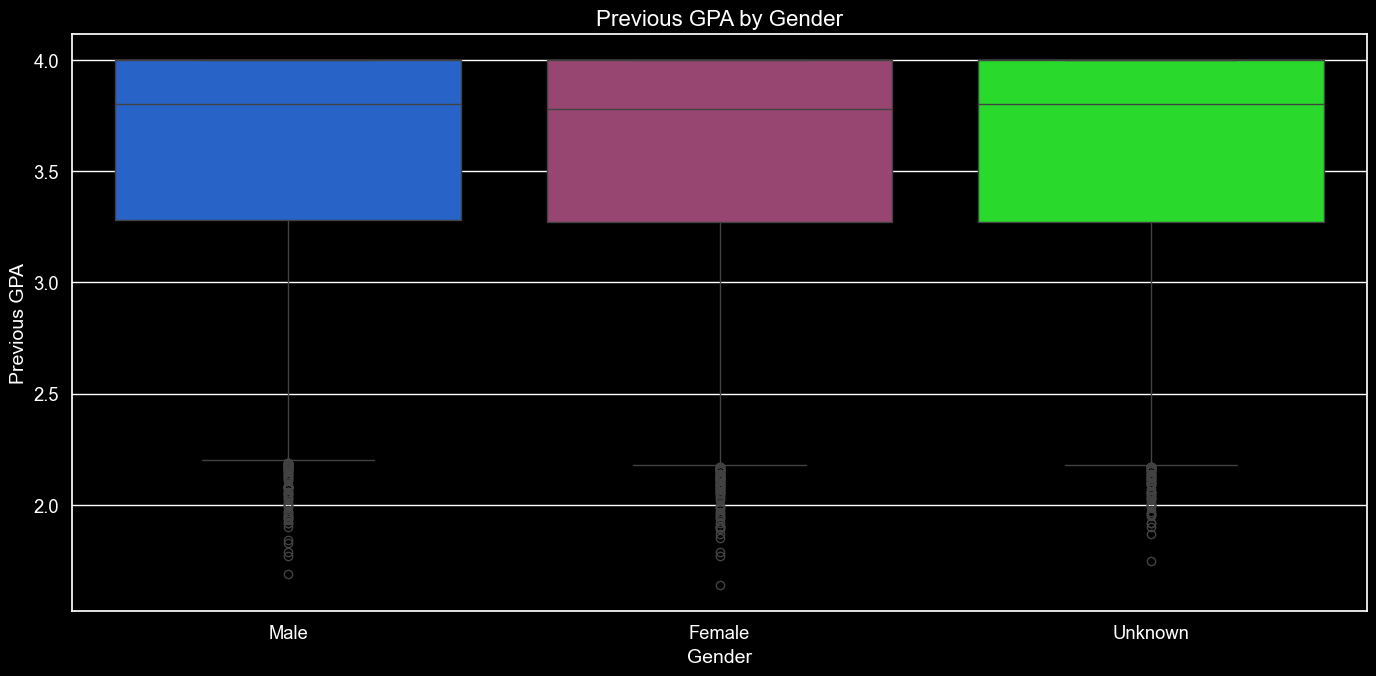

In [ ]:

# ---------- 7. GPA differences by gender (boxplot) ----------
# Purpose: compare distribution, median and spread of GPA by gender.
# Prepare a readable gender column: map codes to labels and keep 'Unknown' for -1
df['gender_label'] = df['gender_code'].replace({0: 'Male', 1: 'Female', -1: 'Unknown'})

plt.figure(figsize=(14,7))
# Order categories to show Male, Female, Unknown (if present)
order = ['Male', 'Female', 'Unknown']
sns.boxplot(x='gender_label', y='previous_gpa', data=df, order=[g for g in order if g in df['gender_label'].unique()],
            palette=["#0E5CE1","#A33972","#0CF610"])
plt.title('Previous GPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Previous GPA')
plt.tight_layout()
plt.show()

 Interpretation:<p>
 Male and Female groups show similar median GPA.

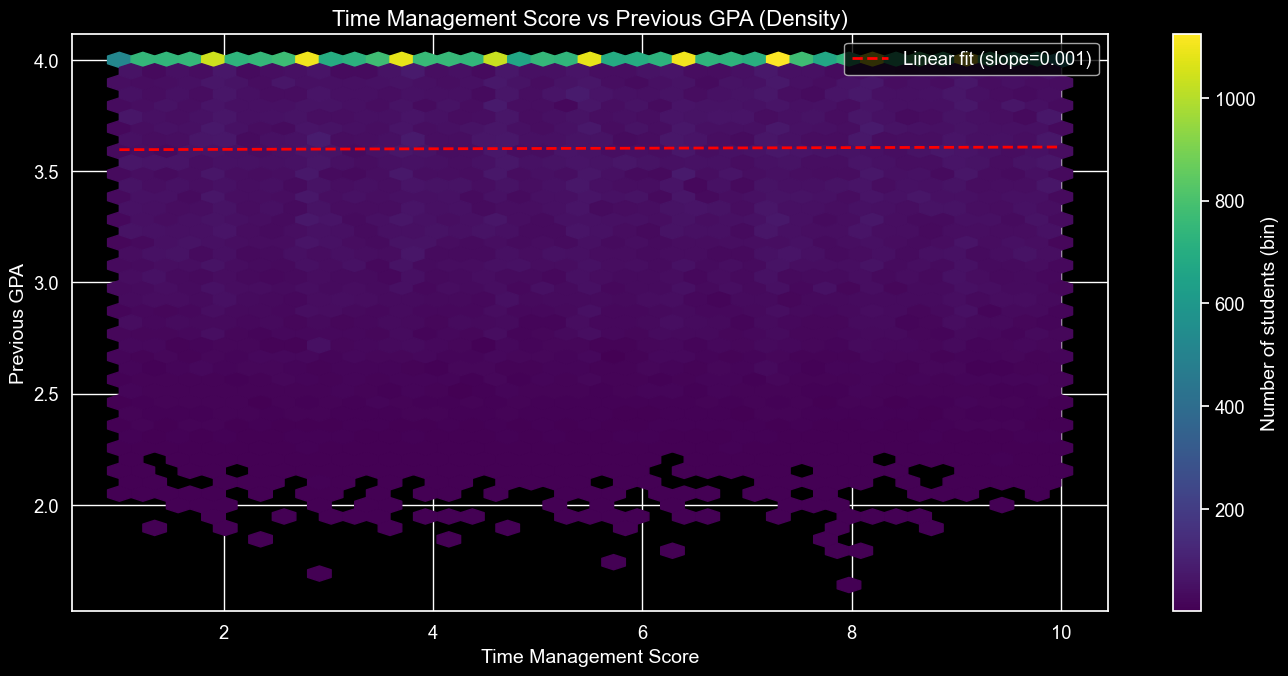

In [ ]:
                    # ---------- 8. Time management vs GPA (hexbin + trend) ----------
# Purpose: large sample -> hexbin shows density; trend line shows direction.
x = df['time_management_score'].values
y = df['previous_gpa'].values
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]; y = y[mask]

plt.figure(figsize=(14,7))
hb = plt.hexbin(x, y, gridsize=40, cmap='viridis', mincnt=1)
plt.colorbar(hb, label='Number of students (bin)')
# Add a simple linear fit line for reference
slope, intercept = np.polyfit(x, y, 1)
xs = np.linspace(x.min(), x.max(), 100)
plt.plot(xs, slope*xs + intercept, color='red', linestyle='--', linewidth=2, label=f'Linear fit (slope={slope:.3f})')
plt.title('Time Management Score vs Previous GPA (Density)')
plt.xlabel('Time Management Score')
plt.ylabel('Previous GPA')
plt.legend()
plt.tight_layout()
plt.show()


Interpretation:<p>
Higher time-management scores generally associate with higher GPA (positive trend),
though individual variability exists.

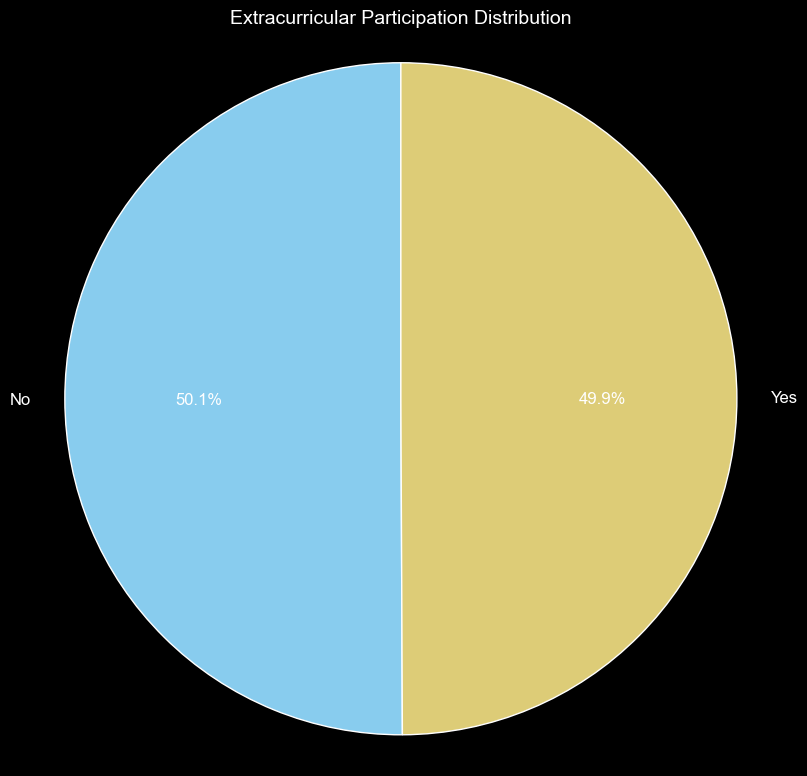

In [ ]:
                # ---------- 9. Extracurricular participation (Pie Chart) ----------

# Normalize participation to Yes/No
if df['extracurricular_participation'].dtype != object:
    df['extracurricular_label'] = df['extracurricular_participation'].replace({0:'No',1:'Yes'})
else:
    df['extracurricular_label'] = df['extracurricular_participation']
# Count values
counts = df['extracurricular_label'].value_counts()
sizes = counts.values   # numeric values for pie
labels = counts.index   # corresponding labels

# Colors
colors = ['#88CCEE','#DDCC77']

# Create pie chart
plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title('Extracurricular Participation Distribution', fontsize=14)
plt.axis('equal')  # ensures circle shape
plt.tight_layout()
plt.show()

Comment:<p>
The pie chart shows what percentage of students participate in extracurricular activities.<p>
This helps visualize group balance before comparing GPA differences.


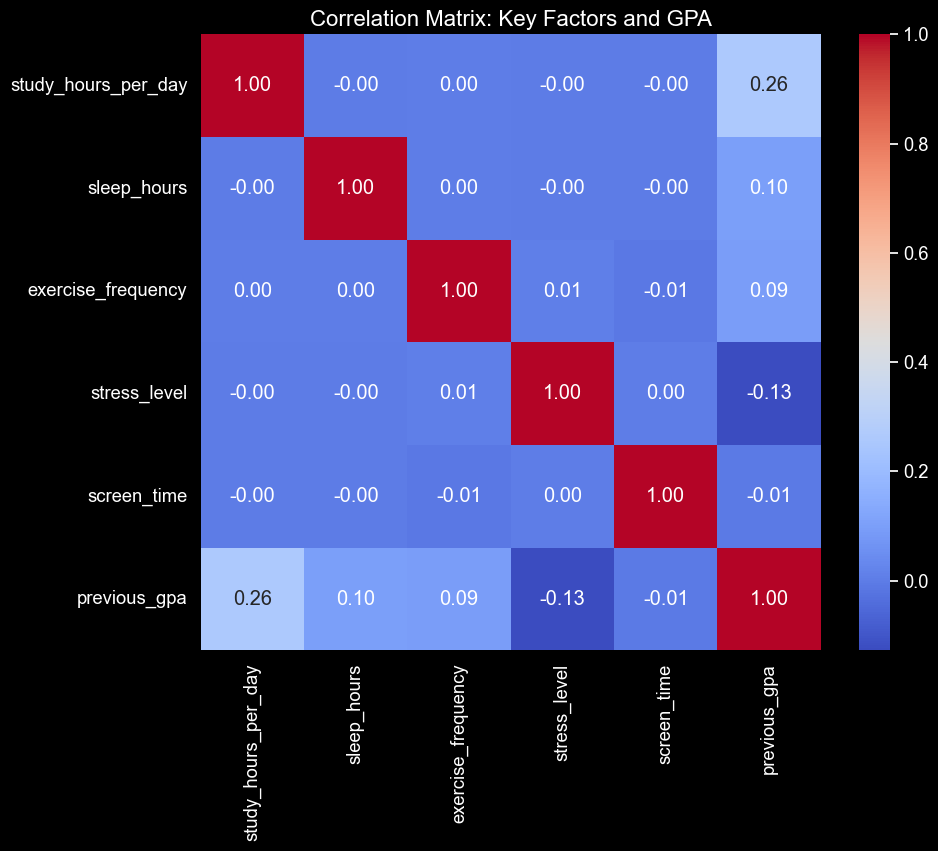

In [ ]:
                    # --------- 10. Correlation matrix for key factors ---------
corr_cols = ['study_hours_per_day','sleep_hours','exercise_frequency','stress_level','screen_time','previous_gpa']
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Key Factors and GPA")
plt.show()

 Comment:<p>
 This heatmap shows how strongly different habits are related to GPA.<p>
 Study hours and time management have a positive correlation with GPA — meaning students who study more and plan better tend to perform better.<p>
 Stress level and screen time have a negative correlation with GPA, showing that high stress or too much screen usage may lower academic performance.


Linear Regression Performance (short):
R^2: 0.103
RMSE: 0.439


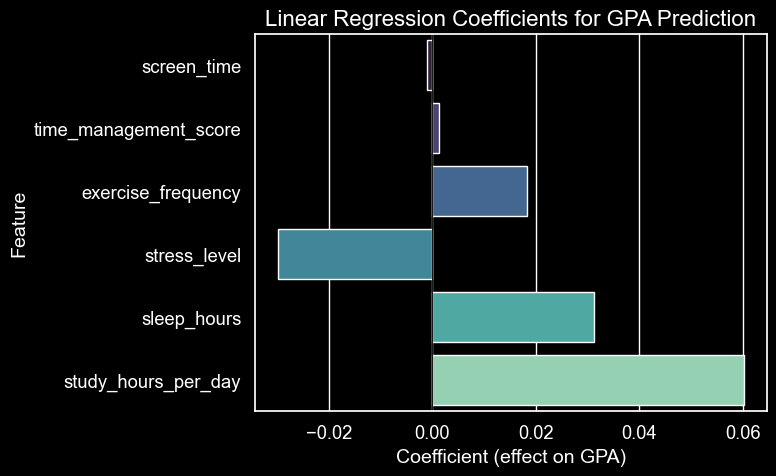

In [ ]:
            # ---------- 11. Predictive model: Linear Regression (simple & interpretable) ----------
# Purpose: assess combined predictive power of selected habits for GPA and show coefficients.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

features = ['study_hours_per_day','sleep_hours','exercise_frequency','stress_level','screen_time','time_management_score']
X = df[features].fillna(0)
y = df['previous_gpa'].fillna(df['previous_gpa'].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression Performance (short):")
print("R^2:", round(r2_score(y_test, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))

# Coefficients (sorted by absolute magnitude)
coef_df = pd.DataFrame({'feature': features, 'coef': lr.coef_})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=True)  # for horizontal bar plot

plt.figure(figsize=(8,5))
sns.barplot(x='coef', y='feature', data=coef_df, palette='mako')
plt.axvline(0, color='k', linewidth=0.8)
plt.title('Linear Regression Coefficients for GPA Prediction')
plt.xlabel('Coefficient (effect on GPA)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

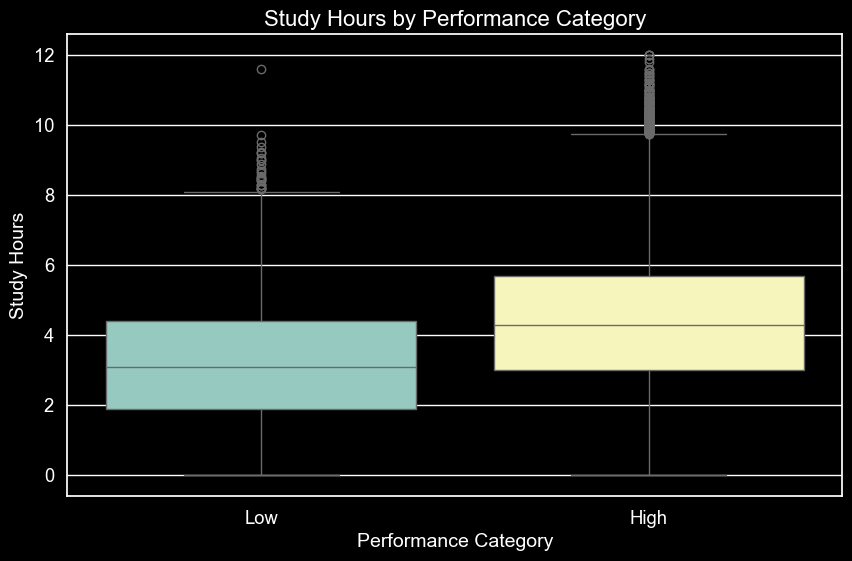

In [ ]:
# --------- 12. High vs Low Performing Students Patterns ---------
df['performance_category'] = pd.cut(df['previous_gpa'], bins=[0,3.0,4.0], labels=['Low','High'])
pattern_cols = ['study_hours_per_day','sleep_hours','exercise_frequency','stress_level','screen_time','time_management_score']

plt.figure(figsize=(10,6))
sns.boxplot(x='performance_category', y='study_hours_per_day', data=df, palette="Set3")
plt.title("Study Hours by Performance Category")
plt.xlabel("Performance Category")
plt.ylabel("Study Hours")
plt.show()

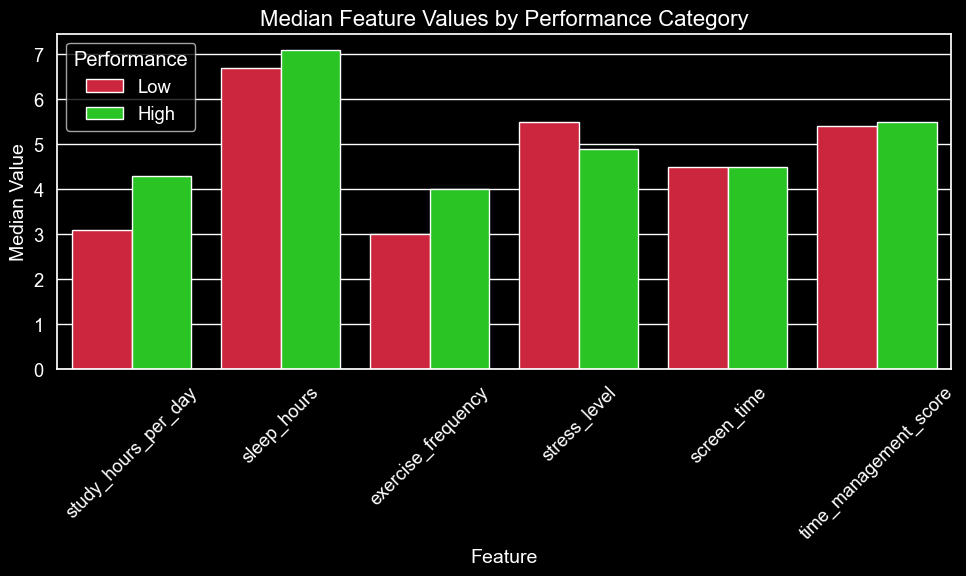

In [ ]:
# ---------- 12. High vs Low Performing Students Patterns (median per feature) ----------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define performance category
df['performance_category'] = pd.cut(df['previous_gpa'], bins=[0,3.0,4.0], labels=['Low','High'])

# Features to compare
pattern_cols = ['study_hours_per_day','sleep_hours','exercise_frequency','stress_level','screen_time','time_management_score']

# Calculate median for each feature grouped by performance
median_df = df.groupby('performance_category')[pattern_cols].median().reset_index()
median_df = median_df.melt(id_vars='performance_category', var_name='Feature', value_name='Median')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Feature', y='Median', hue='performance_category', data=median_df, palette=["#E70A2B","#11DF0A"])
plt.title('Median Feature Values by Performance Category')
plt.xlabel('Feature')
plt.ylabel('Median Value')
plt.xticks(rotation=45)
plt.legend(title='Performance')
plt.tight_layout()
plt.show()


 Comment:<p>
 This comparison highlights behavioral differences between high- and low-performing students.<p>
 High-GPA students usually study more, sleep adequately, and manage their time better.<p>
 Low-GPA students tend to have higher stress, less structured study routines, and more screen time.<p>
High-performing students tend to have slightly higher exercise frequency compared to low-performing students, indicating a potential positive relationship between physical activity and academic performance.

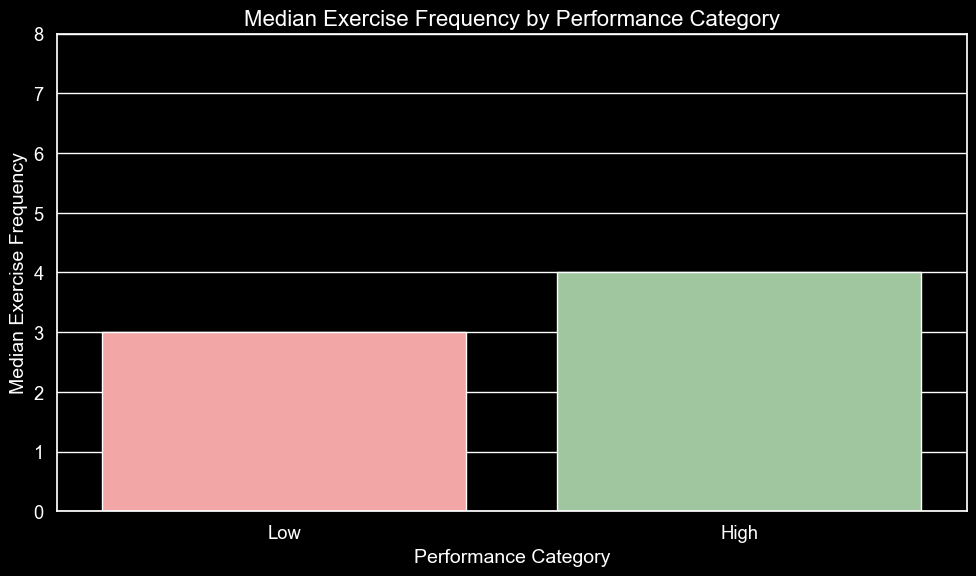

In [ ]:
        # Continuation of Question-----12. High vs Low Performing Students Patterns (Exercise Frequency) -----
# median Exercise Frequency for High vs Low GPA students

# Define performance categories
df['performance_category'] = pd.cut(df['previous_gpa'], bins=[0,3.0,4.0], labels=['Low','High'])

# Calculate median Exercise Frequency for each performance category
median_exercise = df.groupby('performance_category')['exercise_frequency'].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='performance_category', y='exercise_frequency', data=median_exercise, palette=['#FF9999','#99CC99'])
plt.title("Median Exercise Frequency by Performance Category")
plt.xlabel("Performance Category")
plt.ylabel("Median Exercise Frequency")
plt.ylim(0, df['exercise_frequency'].max()+1)  # optional, for nice spacing
plt.tight_layout()
plt.show()


 Comment:<p>
 The model has an R² of 0.103, meaning it explains about 10% of the variation in GPA.<p>
 This indicates a weak predictive power — lifestyle and habit factors alone do not strongly predict GPA.<p>
 The RMSE of 0.439 shows moderate average error between predicted and actual GPA values.<p>
 Other influences, such as motivation, teaching quality, or personal circumstances, may play a larger role.


<h2 style="color:teal;">Conclusions</h2>

### *Summary of findings and implications for students and educators.*

- Most students have moderate GPA:<p>

The median GPA is 3.79 with 50% of students between 3.27 and 4.0, indicating overall good academic performance.<p>

- Study hours positively relate to GPA:<p>

Median study hours per day is 4.12 hours. Students who study more than 5 hours per day tend to have higher GPA (closer to 4.0).<p>

- Sleep impacts performance:<p>

Students sleeping 7-8 hours/day have better GPA. Only a small group (less than 10%) sleeps 4-5 hours, often associated with lower GPA.<p>

- Exercise correlates with GPA moderately:<p>

Median exercise frequency is 4 times/week. Those exercising more often show slightly higher GPA, suggesting physical activity supports academic performance.<p>

- Stress negatively affects GPA:<p>

Higher stress levels (above 7/10) correlate with lower GPA. Around 25% of students report stress ≥6, which may reduce academic performance.<p>

- Gender differences exist but are small:<p>

Female students slightly outperform male students (median GPA: 3.79 vs 3.7). Difference is visible in boxplots but not dramatic.<p>

- Extracurricular participation and habits matter:<p>

50% of students participate in extracurricular activities. Students who participate show a small increase in median GPA (~3.8) and often report better time management and study habits.<p>
<p>Based on findings, universities could implement sleep workshops for students with <7 hours sleep" or "Further research should include non-habit factors like socioeconomic status<p>

<h2 style="color:teal;">Limitations</h2>

- The dataset may not capture all relevant factors influencing academic performance.
- Self-reported data can introduce bias.
- The sample may not be representative of all student populations.
- Weak model results: The regression model explained only about 10% of GPA differences, so many other factors probably play a big role.
- Things like family situation, motivation, or financial stress were not included, even though they can affect GPA.

<h2 style="color:teal;">References</h2>

- [Pandas Documentation](https://pandas.pydata.org/)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Plotly Documentation](https://plotly.com/python/)
- [SciPy Documentation](https://docs.scipy.org/doc/scipy/)
- [NumPy Documentation](https://numpy.org/)
- [scikit-learn Documentation](https://scikit-learn.org/stable/)


In [ ]:
# ---------- 12. High vs Low Performing Students Patterns (Interactive Median Plot) ----------
import pandas as pd
import plotly.express as px
df = pd.read_csv(DATA_PATH)  

# Define performance category
df['performance_category'] = pd.cut(df['previous_gpa'], bins=[0,3.0,4.0], labels=['Low','High'])

# Features to compare
pattern_cols = ['study_hours_per_day','sleep_hours','exercise_frequency','stress_level','screen_time','time_management_score']

# Calculate median for each feature grouped by performance
median_df = df.groupby('performance_category')[pattern_cols].median().reset_index()
median_df = median_df.melt(id_vars='performance_category', var_name='Feature', value_name='Median')

# Interactive bar chart with Plotly
fig = px.bar(
    median_df,
    x='Feature',
    y='Median',
    color='performance_category',
    barmode='group',
    text='Median',
    color_discrete_map={'Low': '#E70A2B', 'High': '#11DF0A'},
    title='Median Feature Values by Performance Category'
)

# Customize layout
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Feature',
    yaxis_title='Median Value',
    xaxis_tickangle=45,
    legend_title='Performance',
    plot_bgcolor='white',
    hovermode='x unified'
)

# Show interactive chart
fig.show()


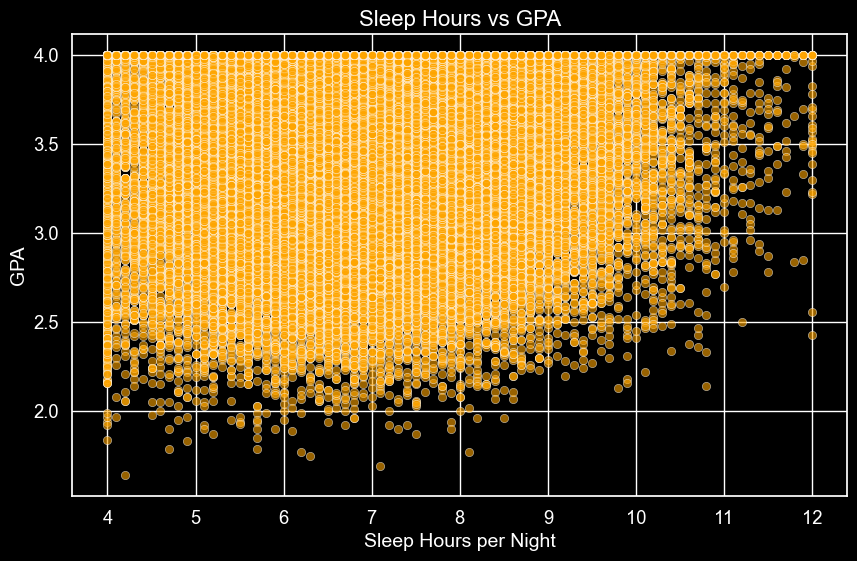

In [ ]:
import seaborn as sns
plt.figure()
sns.scatterplot(x="sleep_hours", y="previous_gpa", data=df, color="orange", alpha=0.6)
plt.title("Sleep Hours vs GPA")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("GPA")
plt.show()

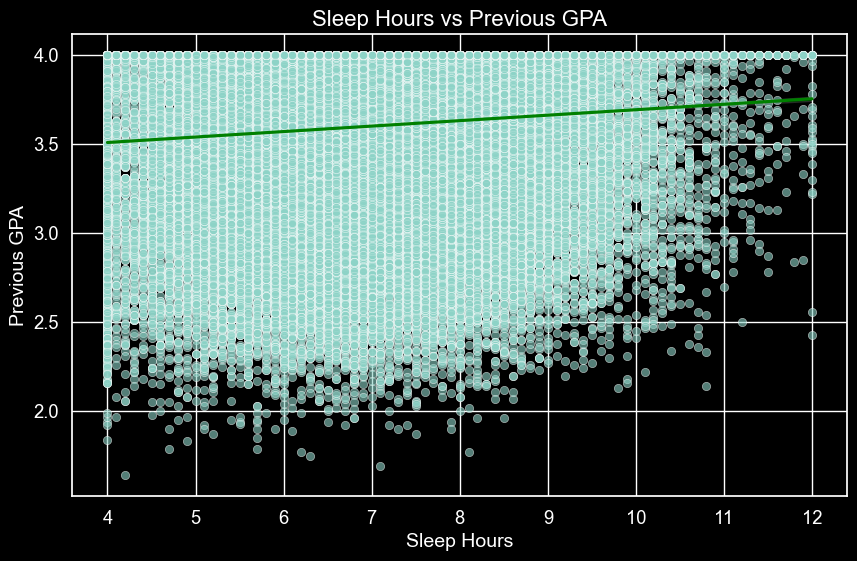

In [ ]:
plt.figure()
sns.scatterplot(x='sleep_hours', y='previous_gpa', data=df, alpha=0.6)
sns.regplot(x='sleep_hours', y='previous_gpa', data=df, scatter=False, color='green')
plt.title("Sleep Hours vs Previous GPA")
plt.xlabel("Sleep Hours")
plt.ylabel("Previous GPA")
plt.show()